In [18]:
#Importowanie potrzebnych bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
#Wczytanie danych
data = pd.read_csv("C:/Users/Marta/Desktop/projekt_terroryzm/terrorism.csv", sep=';', low_memory=False, error_bad_lines=False, encoding='ISO-8859-1')
data

,Year,Month,iday,Country,Region,Provstate,City,Latitude,Longitude,specificity,...,ndays,ransom,ransomamt,hostkidoutcome_txt,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,...,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1.0,...,NaN,1.0,800000.0,NaN,NaN,0.0,1.0,1.0,1.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,...,NaN,0.0,NaN,NaN,NaN,-9.0,-9.0,1.0,1.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1.0,...,NaN,0.0,NaN,NaN,NaN,-9.0,-9.0,1.0,1.0,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,...,NaN,0.0,NaN,NaN,NaN,-9.0,-9.0,1.0,1.0,NaN
5,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,1.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,...,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
7,1970,1,2,United States,North America,California,Oakland,37.791927,-122.225906,1.0,...,NaN,0.0,NaN,NaN,NaN,-9.0,-9.0,0.0,-9.0,NaN
8,1970,1,2,United States,North America,Wisconsin,Madison,43.076592,-89.412488,1.0,...,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
9,1970,1,3,United States,North America,Wisconsin,Madison,43.072950,-89.386694,1.0,...,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN


In [4]:
#Sprawdzenie jak wiele pustych rekordów jest w poszczególnych zmiennych
data.isnull().sum()

Year                       0
Month                      0
iday                       0
Country                    0
Region                     0
Provstate                421
City                     434
Latitude                4556
Longitude               4557
specificity                6
location              126195
summary                66404
alternative           158737
alternative_txt       158737
Success                30116
Sucide                 30116
Attacktype             30116
NAttacktype            30116
targtype1              30116
Targtype               30116
targsubtype1           39130
targsubtype1_txt       39130
corp2                 174708
target2               173843
gname                  30337
claimed               101221
claimmode_txt         165253
Weaptype               35234
weaptype2_txt         172985
nkill                  46149
nkillter              101325
nwound                 50331
propextent_txt        133006
ishostkid              38707
nhostkid      

In [46]:
#Wyznaczenie kraju o największej ilości zamachów terrorystycznych
print("Kraj z największą ilością zamachów terrorystycznych to:" , data['Country'].value_counts().index[0])
print("Drugi kraj z największą ilością zamachów terrorystycznych to:" , data['Country'].value_counts().index[1])

#Wyznaczenie regionu o największej ilości zamachów terrorystycznych
print("Region z największą ilością zamachów terrorystycznych to:" , data['Region'].value_counts().index[0])

#Wyznaczenie stanu USA z największą ilością zamachów terrorystycznych
mask_stan = (data['Country'] == 'United States')
mask_stan
print("Stan USA z największą ilością zamachów terrorystycznych to:" , data.loc[mask_stan, 'Provstate'].value_counts().index[0])

#Wyznaczenie miasta z największą ilością zamachów terrorystycznych
print("Miasto z największą ilością zamachów terrorystycznych to:" , data['City'].value_counts().index[1])
print("Drugie miasto z największą ilością zamachów terrorystycznych to:" , data['City'].value_counts().index[2])

#Wyznaczenie najczęściej przeprowadzanego typu ataku terrorystycznego
print("Najczęściej przeprowadzanym typem ataku terrorystycznego jest:" , data['Attacktype'].value_counts().index[0])

#Wyznaczenie ilości osób zabitych i rannych w wyniku 


Kraj z największą ilością zamachów terrorystycznych to: Iraq
Drugi kraj z największą ilością zamachów terrorystycznych to: Pakistan
Region z największą ilością zamachów terrorystycznych to: Middle East & North Africa
Stan USA z największą ilością zamachów terrorystycznych to: California
Miasto z największą ilością zamachów terrorystycznych to: Baghdad
Drugie miasto z największą ilością zamachów terrorystycznych to: Karachi
Najczęściej przeprowadzanym typem ataku terrorystycznego jest: Bombing/Explosion


In [16]:
#Utworzenie modelu z wykorzystaniem DecisionTreeClassifier(), który potrafi na podstawie cech feats rozróżnić z dokładnością accuracy_score czy dany przypadek zamachu zakończył się sukcesem, czy nie
feats = ['NAttacktype', 'targtype1']
X = data[feats].values
x = data[feats].mean()
X = data[feats].fillna(x);

y = data['Success'].values
a = int(data['Success'].mean())
y = data['Success'].fillna(a)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)




0.9200011007760471

Text(0,0.5,'Count of terrorist attacks')

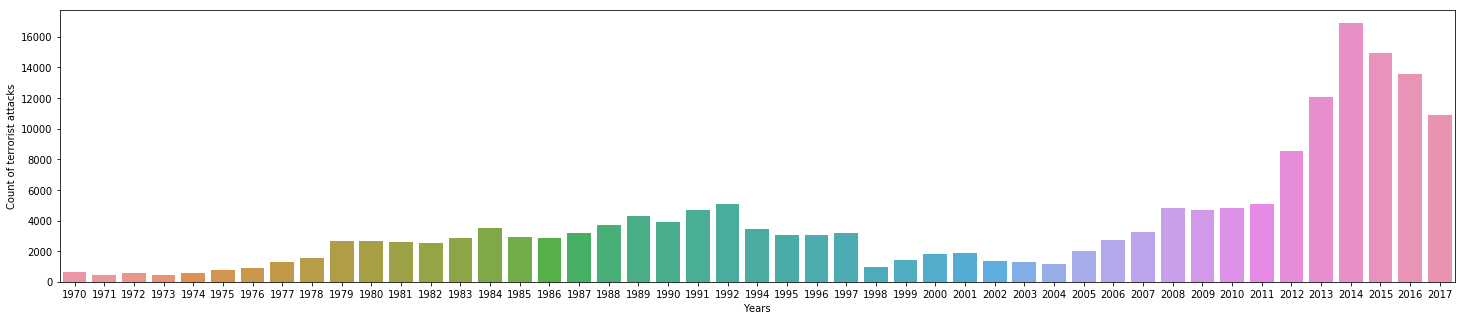

In [29]:
#Wykres ilości zarejestrowanych zamachów w poszczególnych latach
fig1, ax1 = plt.subplots(2,0,figsize=(25,5))
ax1 = sns.countplot(x= 'Year', data = data, orient= "v")
plt.xlabel('Years')
plt.ylabel('Count of terrorist attacks')



Text(0,0.5,'Count of attacktypes')

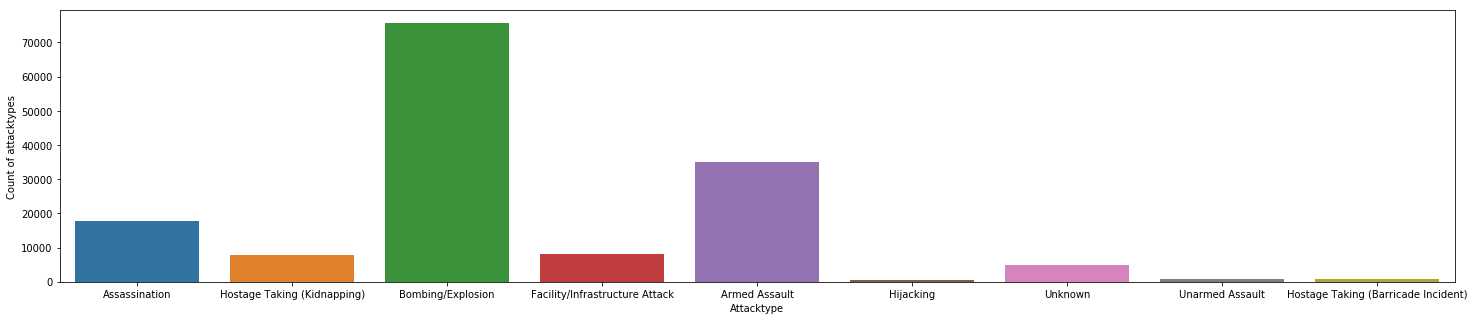

In [45]:
#Wykres zarejestrowanej ilości poszczególnych typów ataku
fig, ax = plt.subplots(2,0,figsize=(25,5))
ax = sns.countplot(x= 'Attacktype', data = data, orient= "v")
plt.xlabel('Attacktype')
plt.ylabel('Count of attacktypes')


Text(0,0.5,'Count of targtypes')

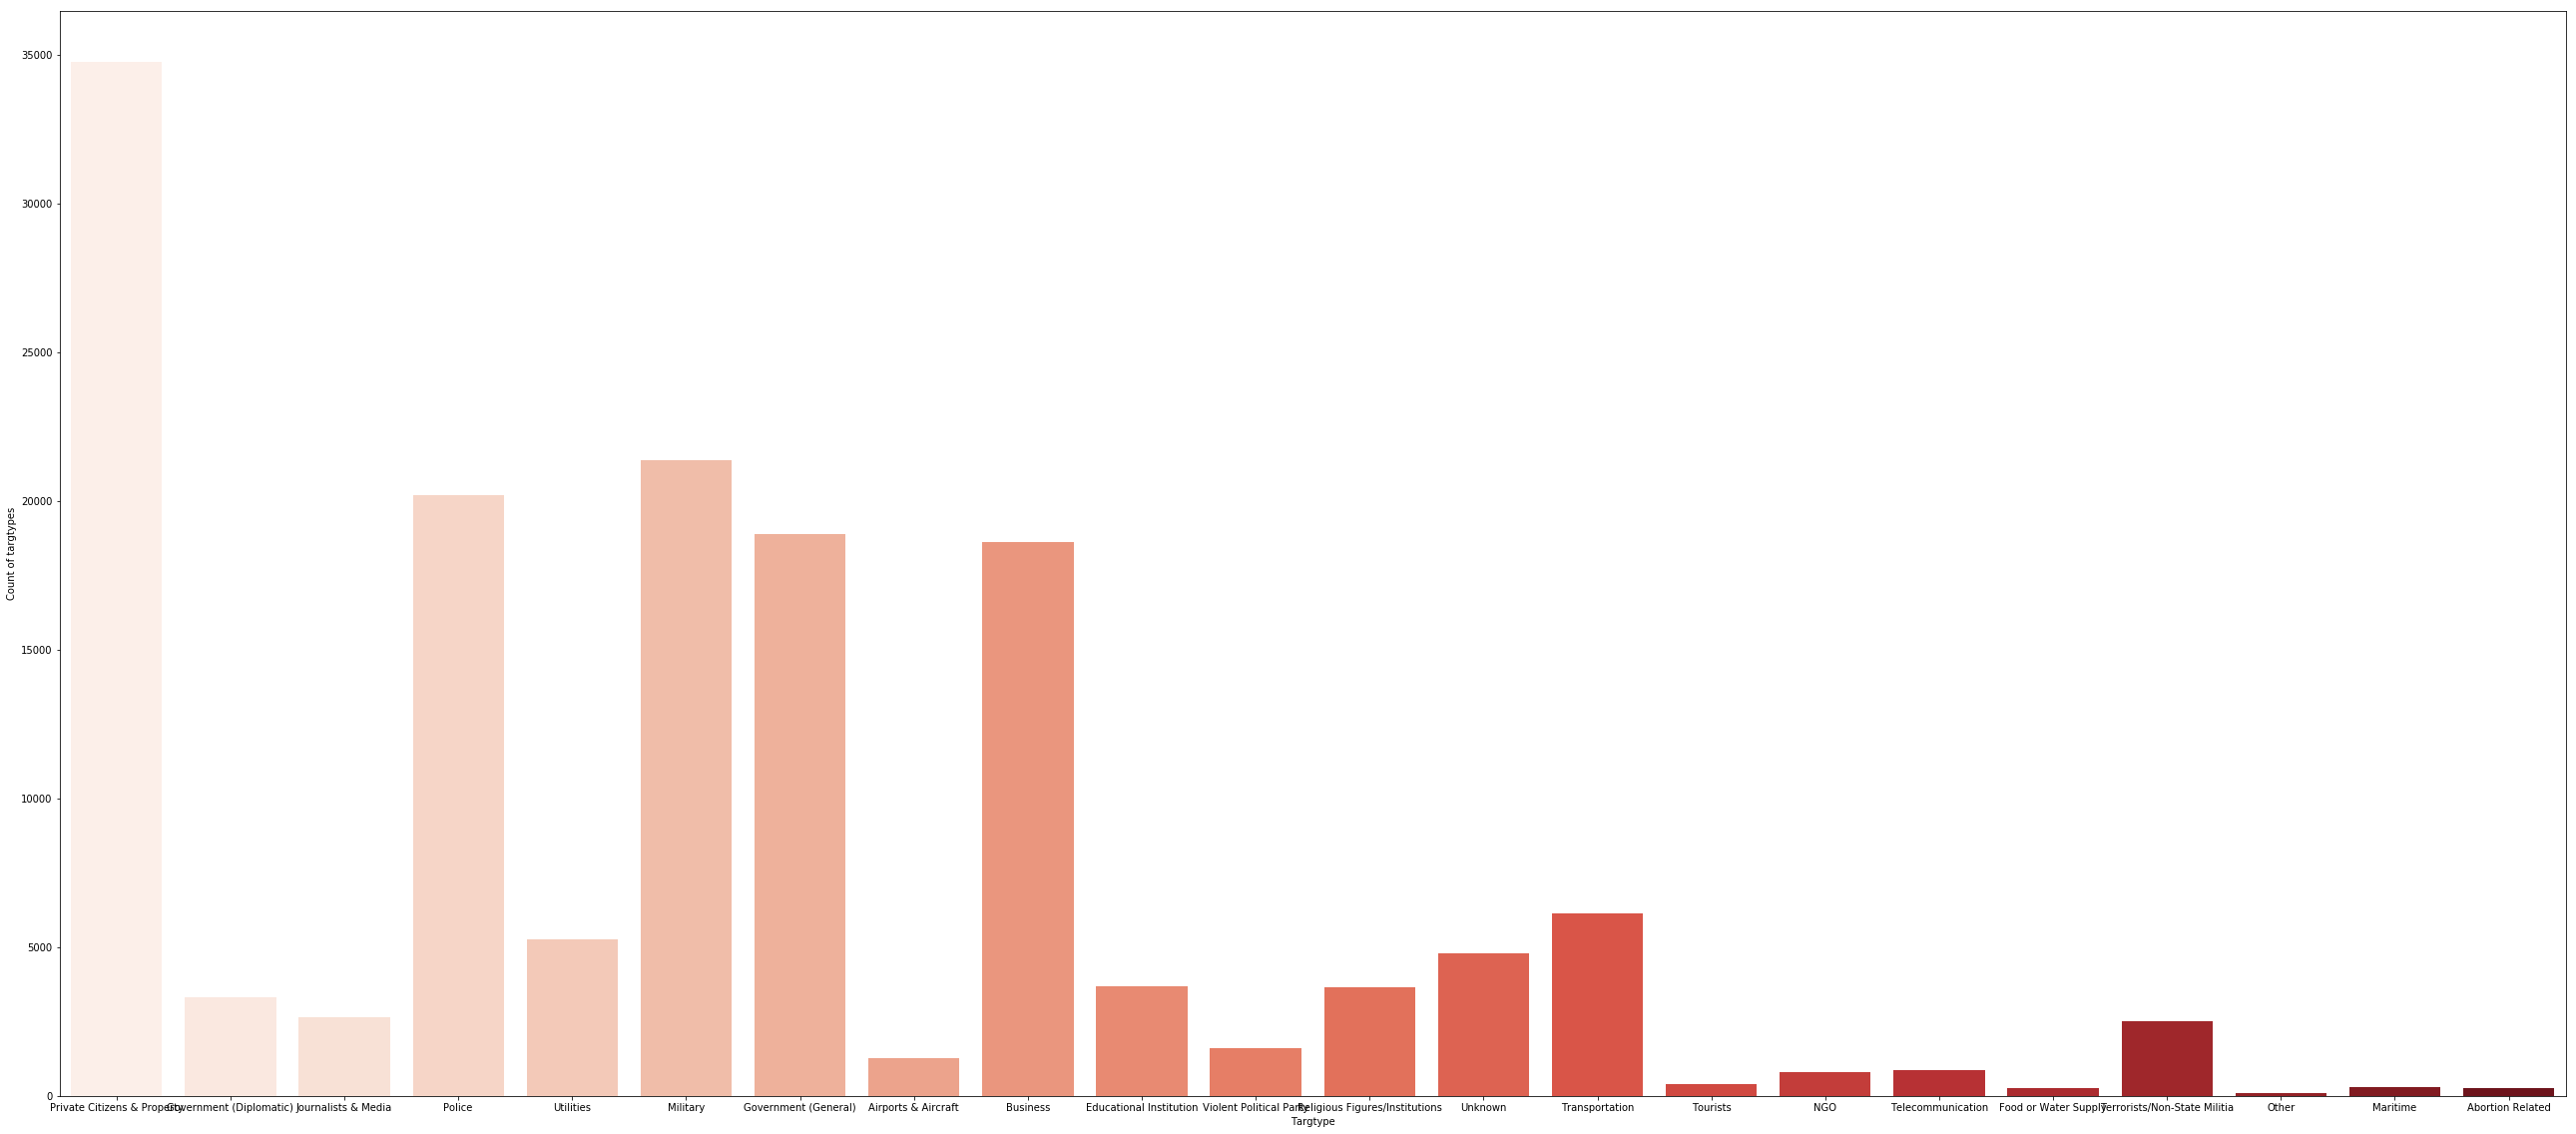

In [37]:
#Wykres ilości zamachów przeprowadzonych na poszczególne cele ataków
fig3, ax3 = plt.subplots(2,0,figsize=(45,20))
ax3 = sns.countplot(x= 'Targtype', data = data, orient= "h", palette= 'Reds')
plt.xlabel('Targtype')
plt.ylabel('Count of targtypes')